In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [2]:
Data=pd.read_csv('Pune_rent.csv')

In [3]:
Data.shape

(22800, 9)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [5]:
Data_new=Data.drop_duplicates()

In [6]:
Data_new.shape

(14553, 9)

In [7]:
Data_new.isnull().sum()

seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         128
dtype: int64

In [8]:
Data_new.dropna()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms
22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms
22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms


In [9]:
Data_new.isnull().sum()

seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         128
dtype: int64

In [10]:
Data_new.shape

(14553, 9)

In [11]:
Data_new.reset_index(inplace=True)

In [12]:
for i in Data_new:
    print(Data_new[i].value_counts())

0        1
15766    1
15736    1
15737    1
15738    1
        ..
9042     1
9043     1
9044     1
9046     1
22799    1
Name: index, Length: 14553, dtype: int64
AGENT      9915
OWNER      4262
BUILDER     376
Name: seller_type, dtype: int64
2    6768
1    5048
3    2312
4     383
5      38
6       3
8       1
Name: bedroom, dtype: int64
BHK    13811
RK       742
Name: layout_type, dtype: int64
Apartment            12755
Studio Apartment       742
Independent House      616
Independent Floor      251
Villa                  179
Penthouse               10
Name: property_type, dtype: int64
Wagholi                      1218
Kharadi                       834
Wakad                         795
Hinjewadi                     788
Hadapsar                      709
                             ... 
New DP Road                     1
Murlidhar Housing Society       1
Pan Card Club Road              1
Pratibha Nagar                  1
Aundh Gaon                      1
Name: locality, Length: 459, dty

In [13]:

inde=set( )
y=['East facing','West facing','Grfloor','North facing','1 of 2floor','NorthEast facing','11 of 11floor','1 of 3floor']
for i in range(len(Data_new['bathroom'])):
    x=Data_new['bathroom'].iloc[i]
    if (x in y ):
        #print(x)
        #print(i)
        inde.add(i)        
inde=list(inde)
len(inde)

            
            
        
                   


30

In [14]:
Data_new.drop(inde,axis=0,inplace=True)

In [15]:
Data_new.shape

(14523, 10)

In [16]:
Data_new['bathroom'].value_counts()

2 bathrooms    7097
1 bathrooms    4800
3 bathrooms    2042
4 bathrooms     350
5 bathrooms      93
6 bathrooms      12
8 bathrooms       1
Name: bathroom, dtype: int64

In [17]:
Data_new.isnull().sum()

index              0
seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         128
dtype: int64

In [18]:
Data_new.dropna(inplace=True)

In [19]:
print(Data_new.isnull().sum())
print(Data_new.shape)


index            0
seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64
(14395, 10)


In [20]:
Data_new.columns

Index(['index', 'seller_type', 'bedroom', 'layout_type', 'property_type',
       'locality', 'price', 'area', 'furnish_type', 'bathroom'],
      dtype='object')

# Outlier

In [21]:
lit=[]
for i in (Data_new['price']):
    if (','in i):
        l=i.split(',')
        L=l[0]+l[1]
        lit.append(float(L))
    else:
        lit.append(float(i))


In [22]:
len(lit)

14395

In [23]:
Data_new

,index,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...,...,...,...
14548,22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms
14549,22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms
14550,22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms
14551,22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms


In [24]:
Data_new['price']=lit

In [25]:
Data_new.isnull().any()

index            False
seller_type      False
bedroom          False
layout_type      False
property_type    False
locality         False
price            False
area             False
furnish_type     False
bathroom         False
dtype: bool

In [26]:
outlier=Data_new[Data_new['price']<33000]

<AxesSubplot:xlabel='price'>

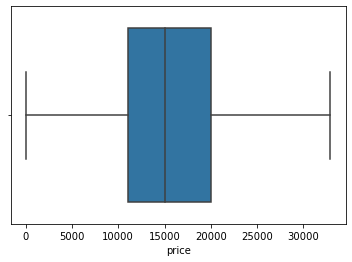

In [27]:
sns.boxplot(outlier['price'])

In [28]:
outlier.shape

(13085, 10)

In [29]:
Outlier_percentage=((Data_new.shape[0]-outlier.shape[0])/Data_new.shape[0]*100)
Outlier_percentage

9.100382077110106

In [30]:
outlier.head(1)

,index,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1 bathrooms


In [31]:
outlier.drop('index',axis=1,inplace=True)

In [32]:
outlier.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

In [33]:
outlier.shape

(13085, 9)

In [34]:
print(outlier['seller_type'].value_counts())
print(outlier['bedroom'].value_counts())
print(outlier['layout_type'].value_counts())
print(outlier['property_type'].value_counts())

AGENT      8623
OWNER      4107
BUILDER     355
Name: seller_type, dtype: int64
2    6446
1    4955
3    1516
4     146
5      21
6       1
Name: bedroom, dtype: int64
BHK    12377
RK       708
Name: layout_type, dtype: int64
Apartment            11474
Studio Apartment       708
Independent House      549
Independent Floor      240
Villa                  109
Penthouse                5
Name: property_type, dtype: int64


# Encoding_technique

In [35]:
outlier.head(2)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2 bathrooms


In [36]:
ONE=outlier.drop(['price','area'],axis=1)

In [37]:
ONE=pd.get_dummies(ONE,drop_first=True)

In [38]:
ONE.shape

(13085, 463)

In [39]:
ONE.reset_index(inplace=True,drop=True)
ONE
ONE.isnull().sum()

bedroom                            0
seller_type_BUILDER                0
seller_type_OWNER                  0
layout_type_RK                     0
property_type_Independent Floor    0
                                  ..
bathroom_3 bathrooms               0
bathroom_4 bathrooms               0
bathroom_5 bathrooms               0
bathroom_6 bathrooms               0
bathroom_8 bathrooms               0
Length: 463, dtype: int64

In [40]:
outlier.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

In [41]:
#L=LabelEncoder()
#La=L.fit_transform(Label)
#La=pd.DataFrame(La,columns=['Locality'])
#La.reset_index(inplace=True,drop=True)
#print(La.isnull().sum())
#La

In [42]:
value=outlier['area']
value.reset_index(drop=True,inplace=True)
value.shape

(13085,)

In [43]:
x=pd.concat([value,ONE],axis=1)
x.reset_index(drop=True,inplace=True)
x


,area,bedroom,seller_type_BUILDER,seller_type_OWNER,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,...,locality_mandai,locality_wadebolhai,furnish_type_Semi-Furnished,furnish_type_Unfurnished,bathroom_2 bathrooms,bathroom_3 bathrooms,bathroom_4 bathrooms,bathroom_5 bathrooms,bathroom_6 bathrooms,bathroom_8 bathrooms
0,450,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,916,2,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1085,3,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,250,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1005,2,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13080,650,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13081,350,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
13082,389,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13083,670,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [44]:
x.isnull().sum()

area                    0
bedroom                 0
seller_type_BUILDER     0
seller_type_OWNER       0
layout_type_RK          0
                       ..
bathroom_3 bathrooms    0
bathroom_4 bathrooms    0
bathroom_5 bathrooms    0
bathroom_6 bathrooms    0
bathroom_8 bathrooms    0
Length: 464, dtype: int64

In [45]:
y=outlier['price']
y.reset_index(drop=True)

0         6750.0
1        18000.0
2        16500.0
3         8000.0
4        25000.0
          ...   
13080    13250.0
13081     7000.0
13082     8500.0
13083    16500.0
13084    12000.0
Name: price, Length: 13085, dtype: float64

# Feature_selection

<AxesSubplot:>

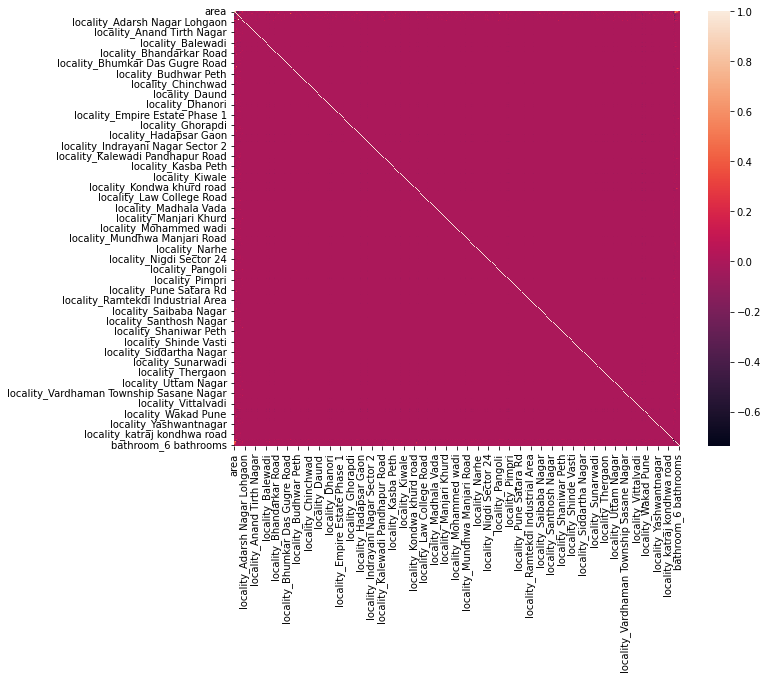

In [46]:
x.corr()
plt.figure(figsize=(10,8))
sns.heatmap(x.corr())

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
print(x.shape)
print(y.shape)

(13085, 464)
(13085,)


In [49]:
x_train_s,x_test_shuffle,y_train,y_test_shuffle=train_test_split(x,y,test_size=10)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=70)

# RANDOM FOREST REGRESSION

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
Random=RandomForestRegressor()

In [53]:
RFR=Random.fit(x,y)
RFR

RandomForestRegressor()

In [54]:
Random.predict(x_test_shuffle)

array([22010.        , 15950.4484127 , 17545.        , 12461.08058608,
       15716.        , 20649.7972583 , 18654.25333333, 29620.83333333,
       10639.425     , 15588.        ])

In [55]:
RAND_pri=Random.predict(x_test_shuffle)
RAND_pri

array([22010.        , 15950.4484127 , 17545.        , 12461.08058608,
       15716.        , 20649.7972583 , 18654.25333333, 29620.83333333,
       10639.425     , 15588.        ])

In [56]:
Random_Forest_regression=Random.score(x_test_shuffle,y_test_shuffle)
Random_Forest_regression

0.824538011450889

<AxesSubplot:ylabel='price'>

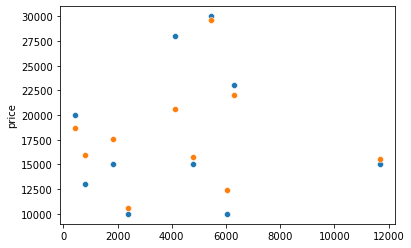

In [57]:
sns.scatterplot(x_test_shuffle.index,y_test_shuffle)
sns.scatterplot(x_test_shuffle.index,RAND_pri)

In [58]:
import pickle

In [59]:
import os as os

In [60]:
os.chdir('C:\\Users\\Ashish_Parulekar\\PYTHON_FILES\\DIPLOYMENT\\PUNE_RENT_APP')

In [61]:
#save=pickle.dumps('C:\\Users\\Ashish_Parulekar\\PYTHON_FILES\\Project_2_Pune_rent_Regression_Model\\DIP_PUNE_RENT.pkl')

In [62]:
pickle.dump(Random,open('Pune_Rent_App.pkl', 'wb'))